# Face Identification ( real & card )

In [ ]:
# clone repo
!git clone https://github.com/boedybios/face_detection.git

Cloning into 'face_detection'...
remote: Enumerating objects: 39, done.
remote: Total 39 (delta 0), reused 0 (delta 0), pack-reused 39
Unpacking objects: 100% (39/39), done.


In [ ]:
# extract data
!unzip "/content/KARTUL UNPAD _ VASTER.zip"

Archive:  /content/KARTUL UNPAD _ VASTER.zip
   creating: KARTUL UNPAD _ VASTER/
  inflating: KARTUL UNPAD _ VASTER/WhatsApp Image 2021-10-13 at 11.49.55.jpeg  
  inflating: KARTUL UNPAD _ VASTER/WhatsApp Image 2021-10-13 at 13.21.46 (1).jpeg  
  inflating: KARTUL UNPAD _ VASTER/WhatsApp Image 2021-10-13 at 13.21.46.jpeg  
  inflating: KARTUL UNPAD _ VASTER/WhatsApp Image 2021-10-13 at 13.21.47.jpeg  
  inflating: KARTUL UNPAD _ VASTER/WhatsApp Image 2021-10-13 at 13.22.44 (1).jpeg  
  inflating: KARTUL UNPAD _ VASTER/WhatsApp Image 2021-10-13 at 13.22.44.jpeg  
  inflating: KARTUL UNPAD _ VASTER/WhatsApp Image 2021-10-13 at 13.22.45.jpeg  
  inflating: KARTUL UNPAD _ VASTER/WhatsApp Image 2021-10-13 at 13.38.23.jpeg  
  inflating: KARTUL UNPAD _ VASTER/WhatsApp Image 2021-10-13 at 13.38.24 (1).jpeg  
  inflating: KARTUL UNPAD _ VASTER/WhatsApp Image 2021-10-13 at 13.38.24 (2).jpeg  
  inflating: KARTUL UNPAD _ VASTER/WhatsApp Image 2021-10-13 at 13.38.24.jpeg  
  inflating: KARTUL UNP

In [ ]:
# load libraries
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# load utilities
CLASSIFIER_PATH = '/content/face_detection/opencv/haarcascades/haarcascade_frontalface_alt2.xml'

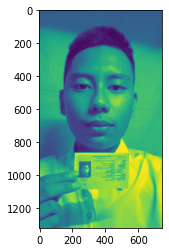

In [ ]:
# load image & convert BGR to RGB & RGB to Grayscale
img = cv2.cvtColor(cv2.cvtColor(cv2.imread("/content/KARTUL UNPAD _ VASTER/WhatsApp Image 2021-10-13 at 13.38.24.jpeg"),
                       cv2.COLOR_BGR2RGB),
                       cv2.COLOR_RGB2GRAY)
# check
plt.imshow(img);

In [ ]:
# load pretrained classifiers - haarcascade
detector = cv2.CascadeClassifier(CLASSIFIER_PATH)

In [ ]:
# show result after detection
detections = detector.detectMultiScale(image=img)
detections

array([[104, 253, 529, 529],
       [248, 938,  59,  59],
       [486, 893,  57,  57]], dtype=int32)

In [ ]:
# convert list result into tuple]
faces = sorted(tuple(data) for data in list(detections))
faces = tuple(faces)
faces

((104, 253, 529, 529), (248, 938, 59, 59), (486, 893, 57, 57))

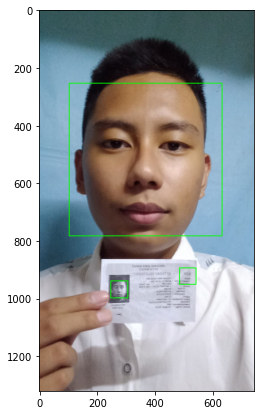

In [ ]:
# define green color as bounding box color
rgb_color = (0, 255, 0)
# convert grayscale into rgb
rgb_img = cv2.cvtColor(cv2.imread("/content/KARTUL UNPAD _ VASTER/WhatsApp Image 2021-10-13 at 13.38.24.jpeg"),
                       cv2.COLOR_BGR2RGB)
for face in faces:
    x, y, w, h = face
    cv2.rectangle(rgb_img, (x, y), (x+w, y+h), rgb_color, 2) 

plt.figure(figsize=(7, 7))
plt.imshow(rgb_img);

In [ ]:
# bounding box & crop image
for idx_y, face in enumerate(faces):
  x, y, w, h = [x for x in face]
  # push crop face to blank list
  cv.imwrite(f"utils/data_1/{idx}_{idx_y}.jpg", cv.resize(img[y:y + h, x:x + w],
                                (200, 200),
                                interpolation=cv.INTER_AREA))

## Test with All Image Data

### Haarcascade

In [ ]:
import os

In [ ]:
def get_coordinates(image_filename):
  """
    input : filename image
    output: tuple coordinates
  """
  # load image & convert BGR to RGB & RGB to Grayscale
  img = cv2.cvtColor(cv2.cvtColor(cv2.imread(image_filename),
                        cv2.COLOR_BGR2RGB),
                        cv2.COLOR_RGB2GRAY)
  # face detection using haarcascade classifiers
  detections = detector.detectMultiScale(image=img)
  # convert list result into tuple
  faces = sorted(tuple(data) for data in list(detections))
  faces = tuple(faces)
  # output
  return faces

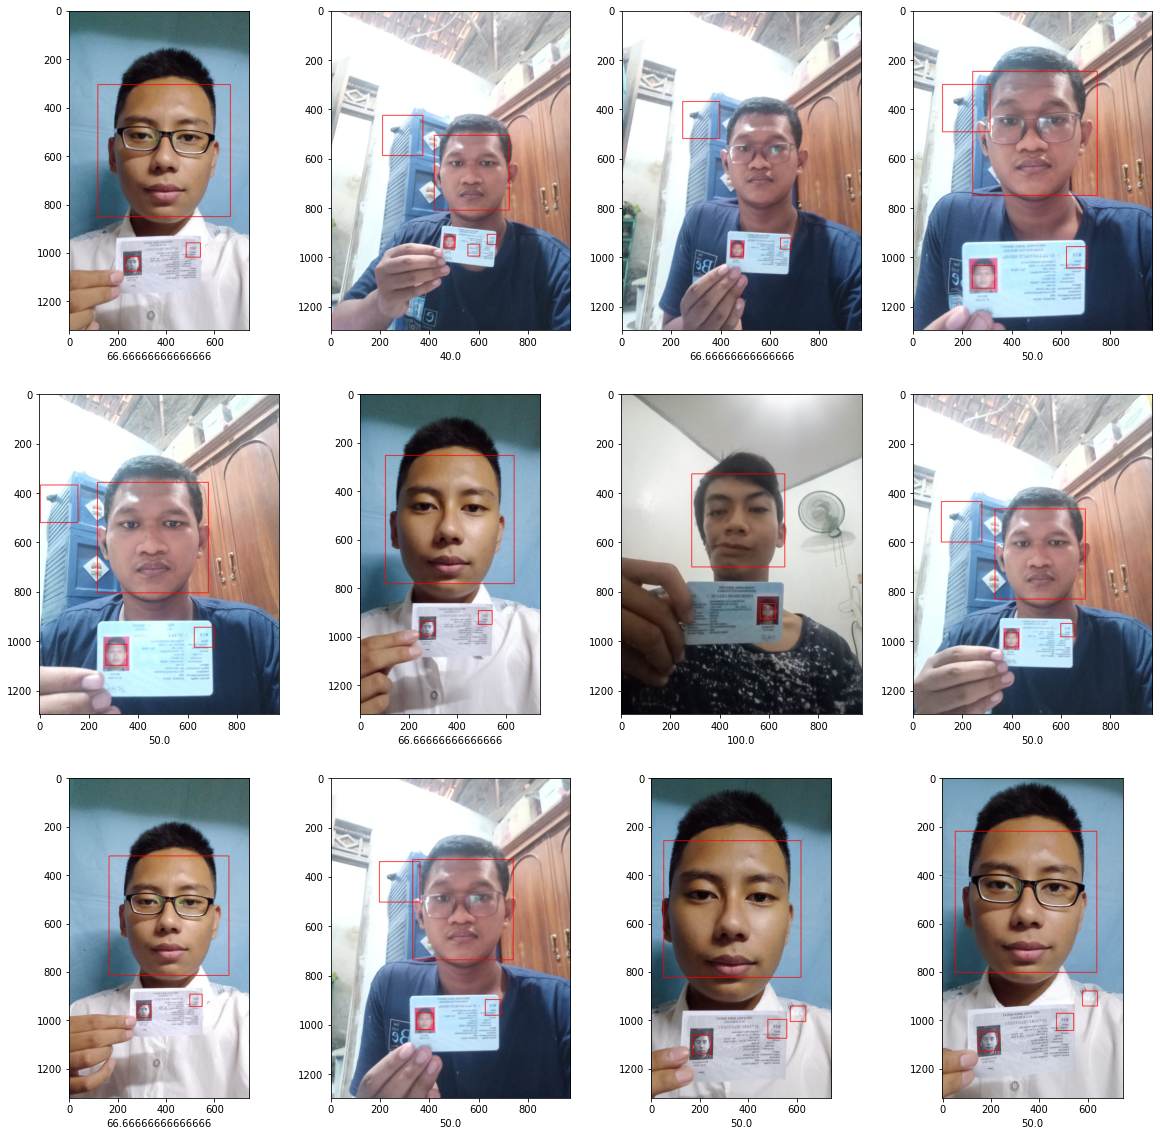

In [ ]:
# load utilities
CLASSIFIER_PATH = '/content/face_detection/opencv/haarcascades/haarcascade_frontalface_alt2.xml'
# load pretrained classifiers - haarcascade
detector = cv2.CascadeClassifier(CLASSIFIER_PATH)

# create figures
fig, ax = plt.subplots(3, 4, figsize = (20, 20))


# read all image in 1 folder
path = "/content/KARTUL UNPAD _ VASTER/"
image = os.listdir(path)

f = 0
# iterate
for row in range(3):
  for col in range(4):
    # apply detection
    faces = get_coordinates(path+image[f])
    # define red color as bounding box color
    rgb_color = (255, 0, 0)
    # convert grayscale into rgb
    rgb_img = cv2.cvtColor(cv2.imread(path+image[f]),
                          cv2.COLOR_BGR2RGB)
    for face in faces:
        x, y, w, h = face
        cv2.rectangle(rgb_img, (x, y), (x+w, y+h), rgb_color, 2) 

    ax[row, col].imshow(rgb_img)
    ax[row, col].set_xlabel(f"{(2/len(faces))*100}")
    f += 1

plt.show()

### HOG

In [ ]:
import dlib

In [ ]:
detector = dlib.get_frontal_face_detector()

In [ ]:
# define coordinates
def get_xywh(detection):
    rectangle = detection
    top_left = rectangle.tl_corner()
    x, y = top_left.x, top_left.y
    w = rectangle.width()
    h = rectangle.height()
    return x, y, w, h

def get_coordinates(image_filename):
  """
    input : filename image
    output: tuple coordinates
  """
  # load image & convert BGR to RGB & RGB to Grayscale
  img = cv2.cvtColor(cv2.imread(image_filename),
                        cv2.COLOR_BGR2RGB)
  # face detection using HOG classifiers
  detections = detector(rgb_img, 1)
  # convert list result into tuple
  faces = sorted(tuple(get_xywh(data)) for data in detections)
  faces = tuple(faces)
  # output
  return faces

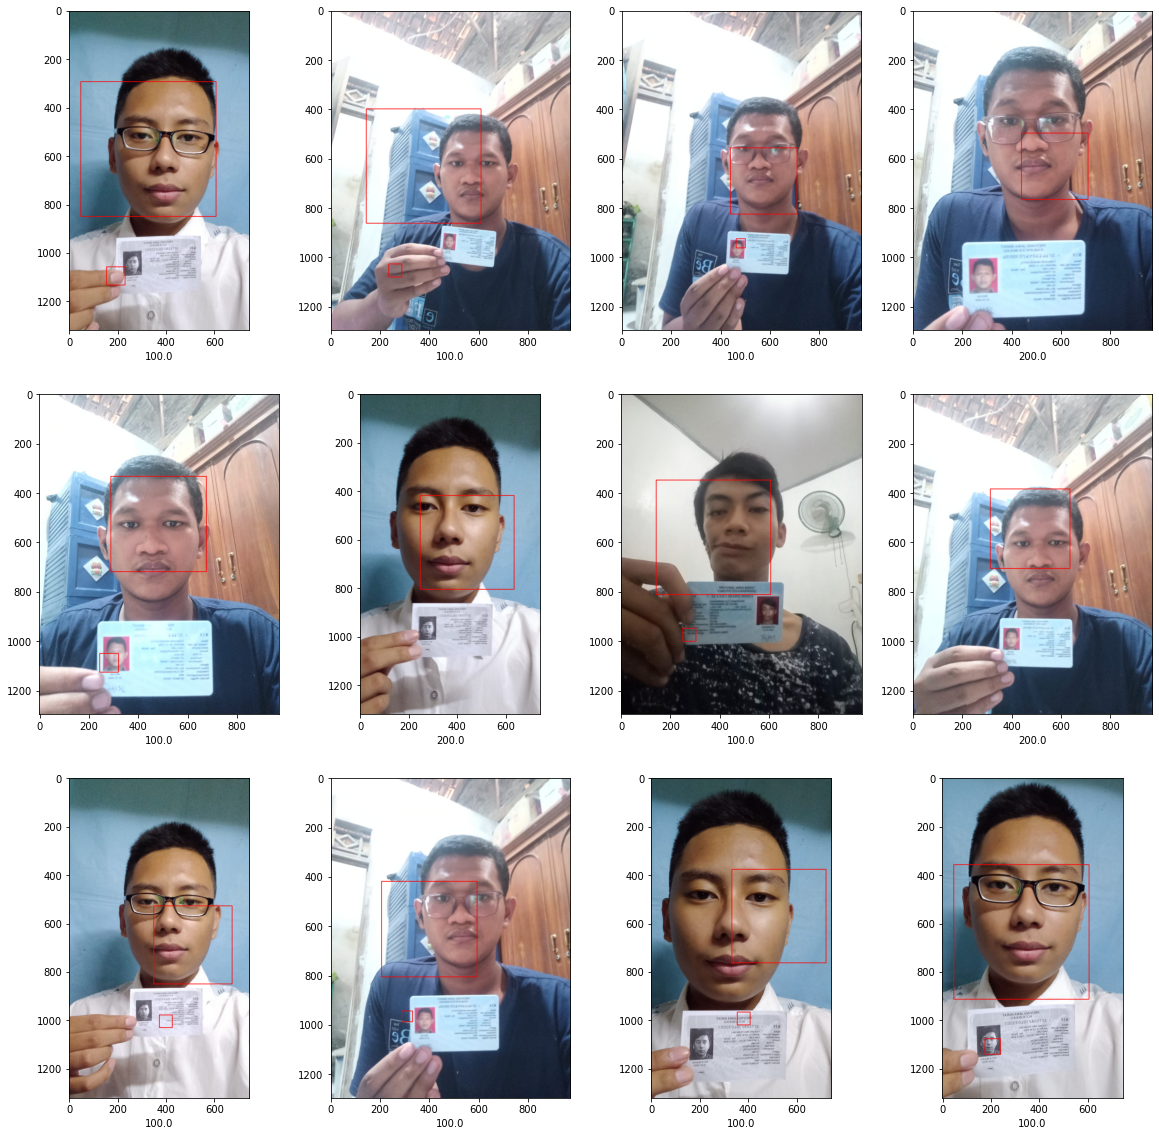

In [ ]:
# create figures
fig, ax = plt.subplots(3, 4, figsize = (20, 20))


# read all image in 1 folder
path = "/content/KARTUL UNPAD _ VASTER/"
image = os.listdir(path)

f = 0
# iterate
for row in range(3):
  for col in range(4):
    # apply detection
    faces = get_coordinates(path+image[f])
    # define red color as bounding box color
    rgb_color = (255, 0, 0)
    # convert grayscale into rgb
    rgb_img = cv2.cvtColor(cv2.imread(path+image[f]),
                          cv2.COLOR_BGR2RGB)
    for face in faces:
        x, y, w, h = face
        cv2.rectangle(rgb_img, (x, y), (x+w, y+h), rgb_color, 2) 

    ax[row, col].imshow(rgb_img)
    ax[row, col].set_xlabel(f"{(2/len(faces))*100}")
    f += 1

plt.show()

note :

1.   Membuat Algoritma mengindentifikasi hasil bounding box adalah wajah
2.   IOU Function untuk menghindari posisi bounding box yang bertimpa

# Siammese Model for Face Similarity

In [ ]:
# clone repo
!git clone https://github.com/harveyslash/Facial-Similarity-with-Siamese-Networks-in-Pytorch.git

Cloning into 'Facial-Similarity-with-Siamese-Networks-in-Pytorch'...
remote: Enumerating objects: 550, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 550 (delta 6), reused 15 (delta 5), pack-reused 532
Receiving objects: 100% (550/550), 6.32 MiB | 18.71 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [ ]:
# load libraries
%matplotlib inline
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import torchvision.utils
import numpy as np
import random
from PIL import Image
import torch
from torch.autograd import Variable
import PIL.ImageOps    
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

In [ ]:
# check torch version
print(torchvision.__version__)

0.10.0+cu111


## Helper Function

In [ ]:
def imshow(img,text=None,should_save=False):
    npimg = img.numpy()
    plt.figure(figsize=(20, 10))
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic',fontweight='bold',
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()    

def show_plot(iteration,loss):
    plt.figure(figsize = (20, 5))
    plt.plot(iteration,loss)
    plt.grid(True);

## Training Configuration

In [ ]:
# class configuration
class Config():
    training_dir = "/content/Facial-Similarity-with-Siamese-Networks-in-Pytorch/data/faces/training/"
    testing_dir = "/content/Facial-Similarity-with-Siamese-Networks-in-Pytorch/data/faces/testing/"
    train_batch_size = 64
    train_number_epochs = 100

In [ ]:
# create siammese dataset
class SiameseNetworkDataset(Dataset):
    
    def __init__(self,imageFolderDataset,transform=None,should_invert=True):
        self.imageFolderDataset = imageFolderDataset    
        self.transform = transform
        self.should_invert = should_invert
        
    def __getitem__(self,index):
        img0_tuple = random.choice(self.imageFolderDataset.imgs)
        #we need to make sure approx 50% of images are in the same class
        should_get_same_class = random.randint(0,1) 
        if should_get_same_class:
            while True:
                #keep looping till the same class image is found
                img1_tuple = random.choice(self.imageFolderDataset.imgs) 
                if img0_tuple[1]==img1_tuple[1]:
                    break
        else:
            while True:
                #keep looping till a different class image is found
                
                img1_tuple = random.choice(self.imageFolderDataset.imgs) 
                if img0_tuple[1] !=img1_tuple[1]:
                    break

        img0 = Image.open(img0_tuple[0])
        img1 = Image.open(img1_tuple[0])
        img0 = img0.convert("L")
        img1 = img1.convert("L")
        
        if self.should_invert:
            img0 = PIL.ImageOps.invert(img0)
            img1 = PIL.ImageOps.invert(img1)

        if self.transform is not None:
            img0 = self.transform(img0)
            img1 = self.transform(img1)
        
        return img0, img1 , torch.from_numpy(np.array([int(img1_tuple[1]!=img0_tuple[1])],dtype=np.float32))
    
    def __len__(self):
        return len(self.imageFolderDataset.imgs)

In [ ]:
# folder configuration
folder_dataset = dset.ImageFolder(root=Config.training_dir)

In [ ]:
# apply class siammese for creating siammese's dataset
siamese_dataset = SiameseNetworkDataset(imageFolderDataset=folder_dataset,
                                        transform=transforms.Compose([transforms.Resize((100,100)),
                                                                      transforms.ToTensor()
                                                                      ])
                                       ,should_invert=False)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


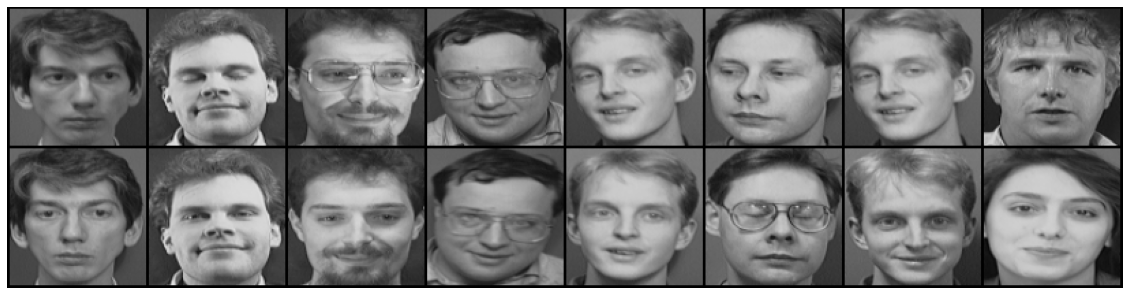

In [ ]:
vis_dataloader = DataLoader(siamese_dataset,
                        shuffle=True,
                        num_workers=8,
                        batch_size=8)
dataiter = iter(vis_dataloader)


example_batch = next(dataiter)
concatenated = torch.cat((example_batch[0],example_batch[1]),0)
imshow(torchvision.utils.make_grid(concatenated))

## Siammese Model

In [ ]:
# Siammese Architecture
class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        self.cnn1 = nn.Sequential(
            nn.ReflectionPad2d(1),
            nn.Conv2d(1, 4, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(4),
            
            nn.ReflectionPad2d(1),
            nn.Conv2d(4, 8, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(8),


            nn.ReflectionPad2d(1),
            nn.Conv2d(8, 8, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(8),


        )

        self.fc1 = nn.Sequential(
            nn.Linear(8*100*100, 500),
            nn.ReLU(inplace=True),

            nn.Linear(500, 500),
            nn.ReLU(inplace=True),

            nn.Linear(500, 5))

    def forward_once(self, x):
        output = self.cnn1(x)
        output = output.view(output.size()[0], -1)
        output = self.fc1(output)
        return output

    def forward(self, input1, input2):
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)
        return output1, output2

In [ ]:
print(SiameseNetwork())

SiameseNetwork(
  (cnn1): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1))
    (2): ReLU(inplace=True)
    (3): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReflectionPad2d((1, 1, 1, 1))
    (5): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU(inplace=True)
    (7): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReflectionPad2d((1, 1, 1, 1))
    (9): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
    (10): ReLU(inplace=True)
    (11): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc1): Sequential(
    (0): Linear(in_features=80000, out_features=500, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=500, out_features=500, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=500, out_features=5, bias=True)
  )
)


In [ ]:
!pip install torchviz

  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=1441d944abd28937bb5bd6855f4b16d46539896efcde2c443ad4438591ad262b
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [ ]:
class ContrastiveLoss(torch.nn.Module):
    """
    Contrastive loss function.
    Based on: http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    """

    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = F.pairwise_distance(output1, output2, keepdim = True)
        loss_contrastive = torch.mean((1-label) * torch.pow(euclidean_distance, 2) +
                                      (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))


        return loss_contrastive

In [ ]:
train_dataloader = DataLoader(siamese_dataset,
                        shuffle=True,
                        num_workers=8,
                        batch_size=Config.train_batch_size)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
# Give dummy batch to forward().
batch = next(iter(train_dataloader))
yhat = SiameseNetwork().cuda()(batch[0].cuda(), batch[1].cuda()) 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
# visualize siam layers
from torchviz import make_dot
make_dot(yhat, params=dict(list(SiameseNetwork().cuda().named_parameters()))).render("siammese_torchviz", format="png")

'siammese_torchviz.png'

![](https://lh6.googleusercontent.com/1kKoGAiqHFc9k1opGLgqY0nQJUE9F5Ly0HZELVvoLKxHhHry3W55ZpWSoRbuRoG7yZ9bEVLWF2qnW0Za4n7h=w1366-h625-rw)

## Training Model Siammese

In [ ]:
net = SiameseNetwork().cuda()
criterion = ContrastiveLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.0005)

In [ ]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in net.state_dict():
    print(param_tensor, "\t", net.state_dict()[param_tensor].size())

Model's state_dict:
cnn1.1.weight 	 torch.Size([4, 1, 3, 3])
cnn1.1.bias 	 torch.Size([4])
cnn1.3.weight 	 torch.Size([4])
cnn1.3.bias 	 torch.Size([4])
cnn1.3.running_mean 	 torch.Size([4])
cnn1.3.running_var 	 torch.Size([4])
cnn1.3.num_batches_tracked 	 torch.Size([])
cnn1.5.weight 	 torch.Size([8, 4, 3, 3])
cnn1.5.bias 	 torch.Size([8])
cnn1.7.weight 	 torch.Size([8])
cnn1.7.bias 	 torch.Size([8])
cnn1.7.running_mean 	 torch.Size([8])
cnn1.7.running_var 	 torch.Size([8])
cnn1.7.num_batches_tracked 	 torch.Size([])
cnn1.9.weight 	 torch.Size([8, 8, 3, 3])
cnn1.9.bias 	 torch.Size([8])
cnn1.11.weight 	 torch.Size([8])
cnn1.11.bias 	 torch.Size([8])
cnn1.11.running_mean 	 torch.Size([8])
cnn1.11.running_var 	 torch.Size([8])
cnn1.11.num_batches_tracked 	 torch.Size([])
fc1.0.weight 	 torch.Size([500, 80000])
fc1.0.bias 	 torch.Size([500])
fc1.2.weight 	 torch.Size([500, 500])
fc1.2.bias 	 torch.Size([500])
fc1.4.weight 	 torch.Size([5, 500])
fc1.4.bias 	 torch.Size([5])


In [ ]:
# Print optimizer's state_dict
print("Optimizer's state_dict:")

for var in optimizer.state_dict()["param_groups"][0]:
  print(var, optimizer.state_dict()["param_groups"][0][var])

Optimizer's state_dict:
lr 0.0005
betas (0.9, 0.999)
eps 1e-08
weight_decay 0
amsgrad False
params [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


In [ ]:
counter = []
loss_history = [] 
iteration_number = 0

In [ ]:
# training
for epoch in range(0,Config.train_number_epochs):
    for i, data in enumerate(train_dataloader,0):
        img0, img1 , label = data
        img0, img1 , label = img0.cuda(), img1.cuda() , label.cuda()
        optimizer.zero_grad()
        output1,output2 = net(img0,img1)
        loss_contrastive = criterion(output1,output2,label)
        loss_contrastive.backward()
        optimizer.step()
        if i %10 == 0 :
            print("Epoch number {}\nCurrent loss {}\n".format(epoch,loss_contrastive.item()))
            iteration_number +=10
            counter.append(iteration_number)
            loss_history.append(loss_contrastive.item())

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch number 0
Current loss 1.334937334060669

Epoch number 1
Current loss 1.4199044704437256

Epoch number 2
Current loss 1.063904047012329

Epoch number 3
Current loss 0.5335994362831116

Epoch number 4
Current loss 0.5636774301528931

Epoch number 5
Current loss 0.36696866154670715

Epoch number 6
Current loss 0.4465130567550659

Epoch number 7
Current loss 0.3778773844242096

Epoch number 8
Current loss 0.16452845931053162

Epoch number 9
Current loss 0.17991545796394348

Epoch number 10
Current loss 0.18008095026016235

Epoch number 11
Current loss 0.13827000558376312

Epoch number 12
Current loss 0.08026584982872009

Epoch number 13
Current loss 0.1713390052318573

Epoch number 14
Current loss 0.1188933402299881

Epoch number 15
Current loss 0.06232456862926483

Epoch number 16
Current loss 0.13854508101940155

Epoch number 17
Current loss 0.060478996485471725

Epoch number 18
Current loss 0.1004180908203125

Epoch number 19
Current loss 0.1054648607969284

Epoch number 20
Curren

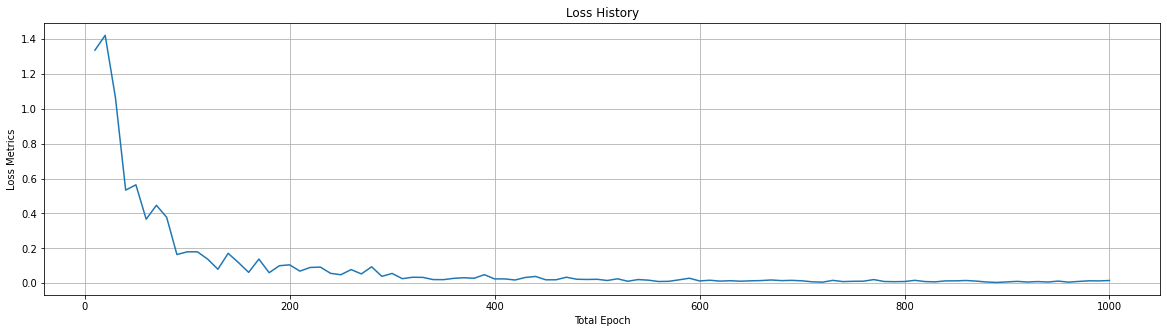

In [ ]:
# metrics visualisation
show_plot(counter, loss_history)
plt.title("Loss History")
plt.xlabel("Total Epoch")
plt.ylabel("Loss Metrics");

In [ ]:
# save model
torch.save(net.state_dict(), "/content/siammese.h5")

## Testing Model

In [ ]:
def imshow(img,text=None,should_save=False):
    npimg = img.numpy()
    plt.figure(figsize=(10, 8))
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic',fontweight='bold',
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()   

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


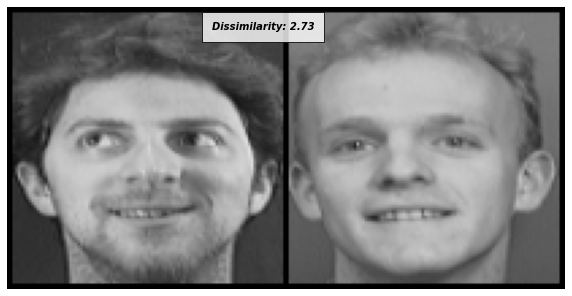

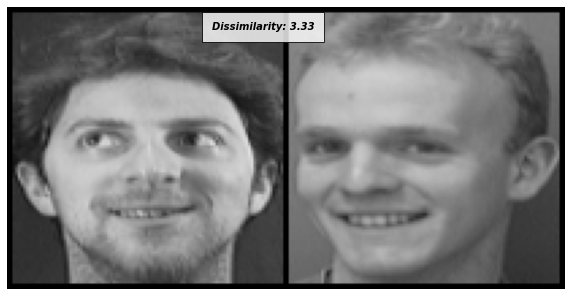

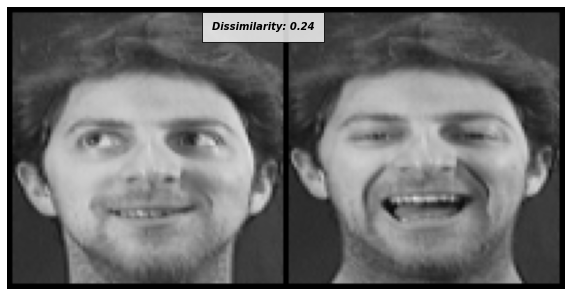

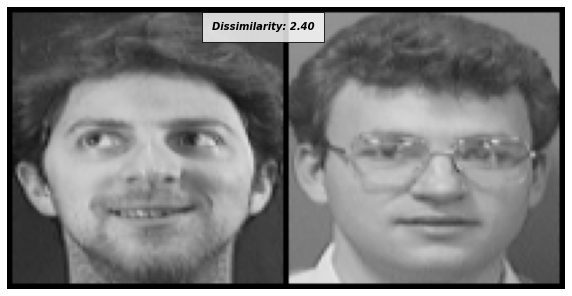

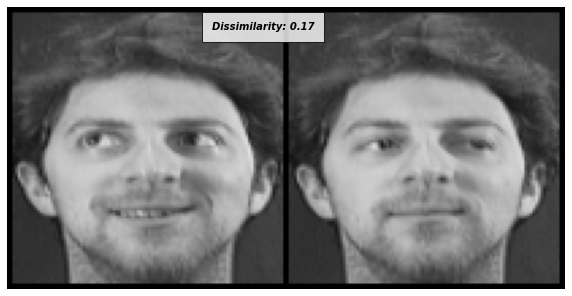

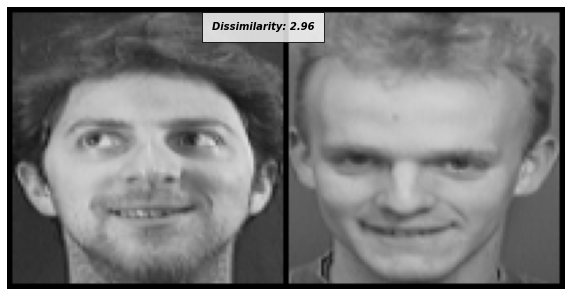

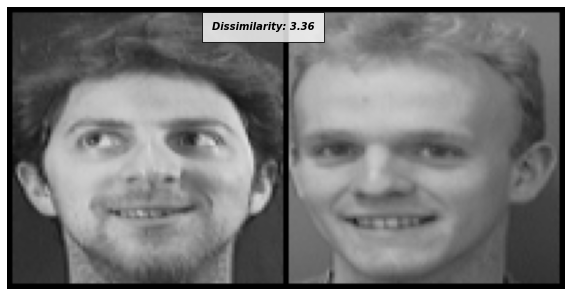

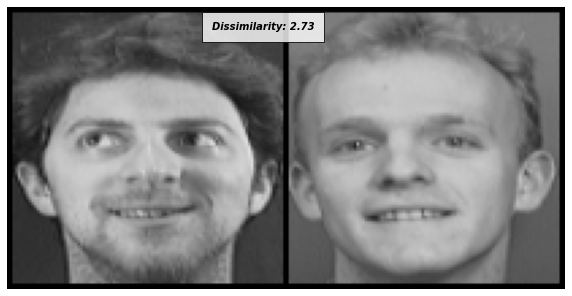

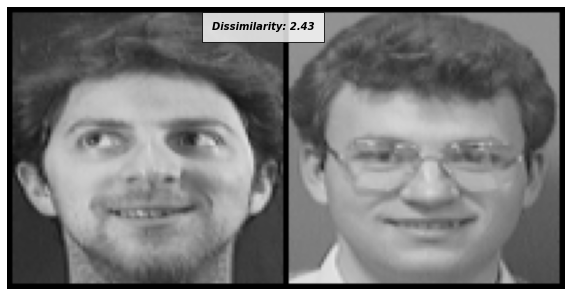

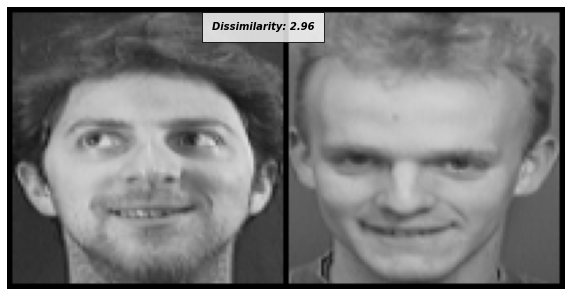

In [ ]:
folder_dataset_test = dset.ImageFolder(root=Config.testing_dir)
siamese_dataset = SiameseNetworkDataset(imageFolderDataset=folder_dataset_test,
                                        transform=transforms.Compose([transforms.Resize((100,100)),
                                                                      transforms.ToTensor()
                                                                      ])
                                       ,should_invert=False)

test_dataloader = DataLoader(siamese_dataset,num_workers=6,batch_size=1,shuffle=True)
dataiter = iter(test_dataloader)
x0,_,_ = next(dataiter)

for i in range(10):
    _,x1,label2 = next(dataiter)
    concatenated = torch.cat((x0,x1),0)
    
    output1,output2 = net(Variable(x0).cuda(),Variable(x1).cuda())
    euclidean_distance = F.pairwise_distance(output1, output2)
    imshow(torchvision.utils.make_grid(concatenated),'Dissimilarity: {:.2f}'.format(euclidean_distance.item()))

# Text-OCR for KTP Recognition

In [ ]:
!pip install ocrspace

  Created wheel for ocrspace: filename=ocrspace-2.3.0-py3-none-any.whl size=2321 sha256=51efada766d39c7f8c7cebdecb24ee530091cfcb13cbe1e38980098b856240a1
  Stored in directory: /root/.cache/pip/wheels/40/0a/f2/8694d1950b3aa8eec0ac98de41a61f7d8b18004cbb64bd8b98
Successfully built ocrspace


In [ ]:
import ocrspace
api = ocrspace.API()
# Or if you have a custom API host, API key or desired language, pass those:
api = ocrspace.API(endpoint='https://api.ocr.space/parse/image', 
                   api_key='c1876db79188957', 
                   language=ocrspace.Language.English)

In [ ]:
result = api.ocr_file('/content/WhatsApp Image 2021-10-13 at 18.40.47.jpeg')

In [ ]:
[x.replace("\r", "").strip() for x in result.split("\n")]

['NIK',
 'Nama',
 'Latur',
 'kelamin',
 'Alamat',
 'RT/RW',
 'KeVDesa',
 'Kecama tan',
 'Agama',
 'Status Perkamnart',
 'Pekerjaan',
 'Kewarganegaraan',
 'Beriaku Hingga',
 'PROVINSI JAWA BARAT',
 'KABUPATEN BEKASI',
 'FURKHON NURDIYANTO',
 'BEKASI, 04-12-2003',
 'LAKI-LAKI',
 'Gol- Darah',
 'KPPANGUPUKAN',
 '001/004',
 'JATIBARU',
 'CIKARANG TIMUR',
 'ISLAM',
 'BELUM KAWIN',
 'PELAJARNAHASISWA',
 'WNI',
 'SEUMUR HIDUP',
 'BEKASI',
 '16-12-2020',
 '']

In [ ]:
!pip install easyocr

     |████████████████████████████████| 63.6 MB 20 kB/s 
     |████████████████████████████████| 37.1 MB 50 kB/s 


In [ ]:
import os
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
reader = easyocr.Reader(['id'])

In [ ]:
result = reader.readtext("/content/WhatsApp Image 2021-10-13 at 18.40.47.jpeg")

In [ ]:
[x[1] for x in result]

['PROVINSI JAWA BARAT',
 'KABUPATEN BEKASI',
 'NIK',
 '3216110412030006',
 'Nama',
 'FURKHON NURDIYANTO',
 'TompavTgl Lahır',
 'BEKASI, 04-12-2003',
 'Jenskelamin',
 'LAKI-LAKI',
 'Gol',
 'Darah',
 'Alamat',
 'KP PANGUPUKAN',
 'RTAW',
 '001/004',
 'Kel/Desa',
 'JATIBAAU',
 'Kecamalan',
 'CIKARANG TIMUR',
 'Agama',
 'ISLAM',
 'Slatus Perkawınar BELUM KAWIN',
 'Pekerjaan',
 'PELAJARMAHASISWA',
 'BeKASI',
 'Kewarganegaraan',
 'WNI',
 "16-'2-2025",
 'Beraku Hingga',
 'SEUMUR HIDUP',
 'g',
 '22 =',
 '']

# Inference System

In [ ]:
# STREAMLITE
  # INPUT GAMBAR -> REALTIME / UPLOAD
    # FACE DETECTION
      # CROP FACE
      # CHECK CROPPED IS FACE
    # FACE SIMILARITY -> EUCLIDEAN
    # VALID / INVALID
  # INPUT KTP
    # KTP RECOGNITION
      # STORE TO SQLITE

# Insight Survey

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set styling use
plt.style.use("fivethirtyeight")

Feature Engineering

In [3]:
# read dataset
data = pd.read_excel("/content/drive/MyDrive/LOMBA UNIV/Survey Masyarakat tentang Proses Vaksinasi (Jawaban).xlsx")

In [4]:
data.head()

Timestamp  ...                       Email Address
0 2021-10-12 20:31:45.993  ...  2110631160014@student.unsika.ac.id
1 2021-10-12 21:08:06.615  ...  2110631160079@student.unsika.ac.id
2 2021-10-12 21:08:39.665  ...  2110631160057@student.unsika.ac.id
3 2021-10-12 21:09:08.396  ...  2110631160018@student.unsika.ac.id
4 2021-10-12 21:12:29.309  ...  2110631160034@student.unsika.ac.id

[5 rows x 10 columns]

In [5]:
# change column names
data.columns = ["TIME",
                "SCORE",
                "NAME",
                "AGE",
                "JOB",
                "LOCATION",
                "TOTAL_VAKSIN",
                "WAITING_TIME_V",
                "WAITING_TIME_C",
                "EMAIL"]

In [6]:
# save
data.to_excel('extraction_survey.xlsx', index = False)

In [ ]:
# check
data.head()

TIME  ...                               EMAIL
0 2021-10-12 20:31:45.993  ...  2110631160014@student.unsika.ac.id
1 2021-10-12 21:08:06.615  ...  2110631160079@student.unsika.ac.id
2 2021-10-12 21:08:39.665  ...  2110631160057@student.unsika.ac.id
3 2021-10-12 21:09:08.396  ...  2110631160018@student.unsika.ac.id
4 2021-10-12 21:12:29.309  ...  2110631160034@student.unsika.ac.id

[5 rows x 10 columns]

In [ ]:
# feature selection
df = data[['AGE', 'JOB', 'LOCATION', 'TOTAL_VAKSIN', 'WAITING_TIME_V', 'WAITING_TIME_C']]

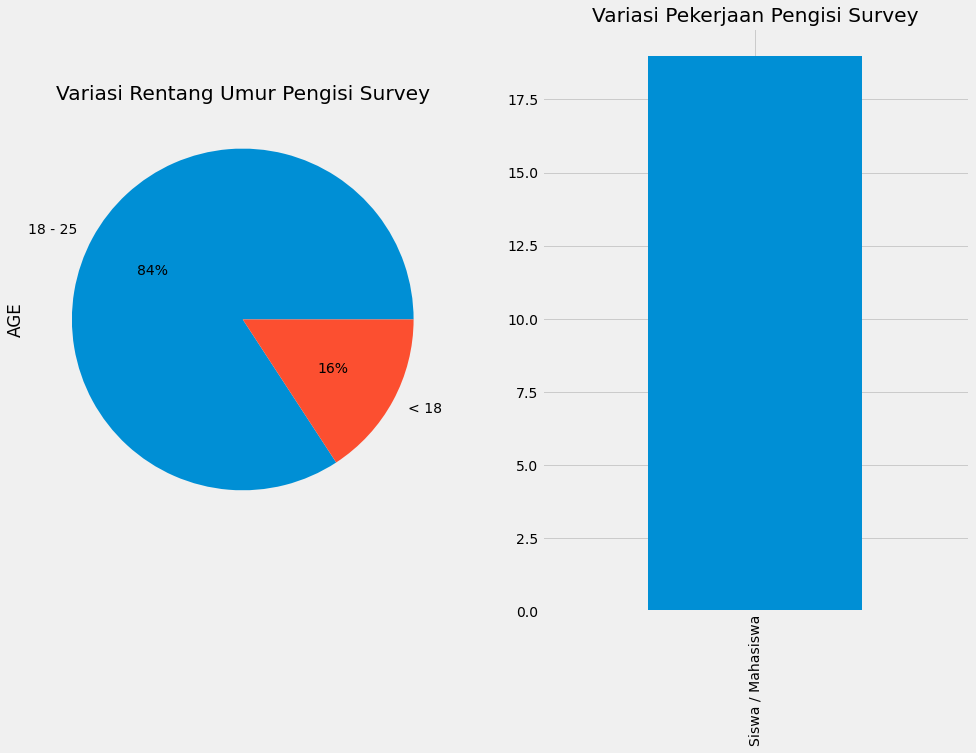

In [ ]:
# age
fig, ax = plt.subplots(1, 2, figsize = (15, 10))
df.AGE.value_counts().plot.pie(autopct='%1.0f%%', ax = ax[0]).set_title("Variasi Rentang Umur Pengisi Survey");
df.JOB.value_counts().plot.bar(ax = ax[1]).set_title("Variasi Pekerjaan Pengisi Survey");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


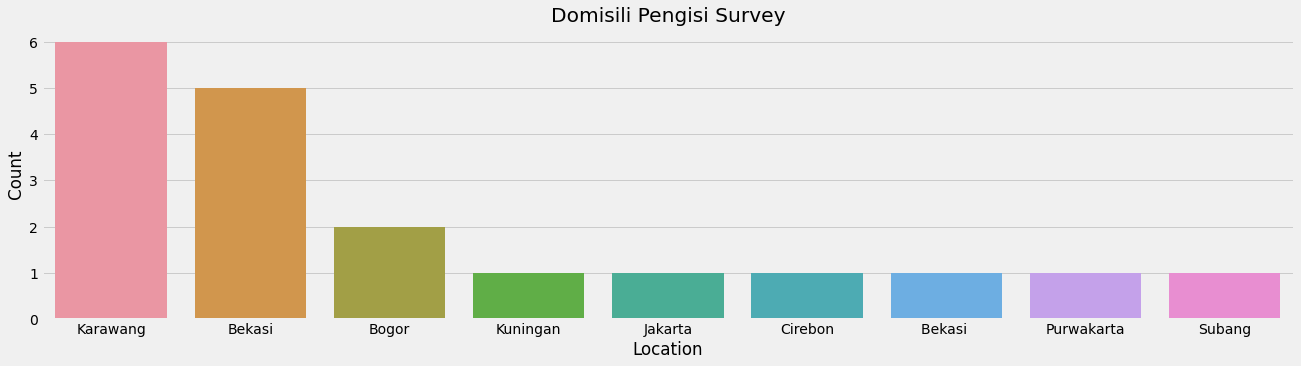

In [ ]:
plt.figure(figsize = (20, 5))
sns.countplot(df.LOCATION, order =  df.LOCATION.value_counts().index)
plt.title("Domisili Pengisi Survey")
plt.ylabel("Count")
plt.xlabel("Location");

In [ ]:
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


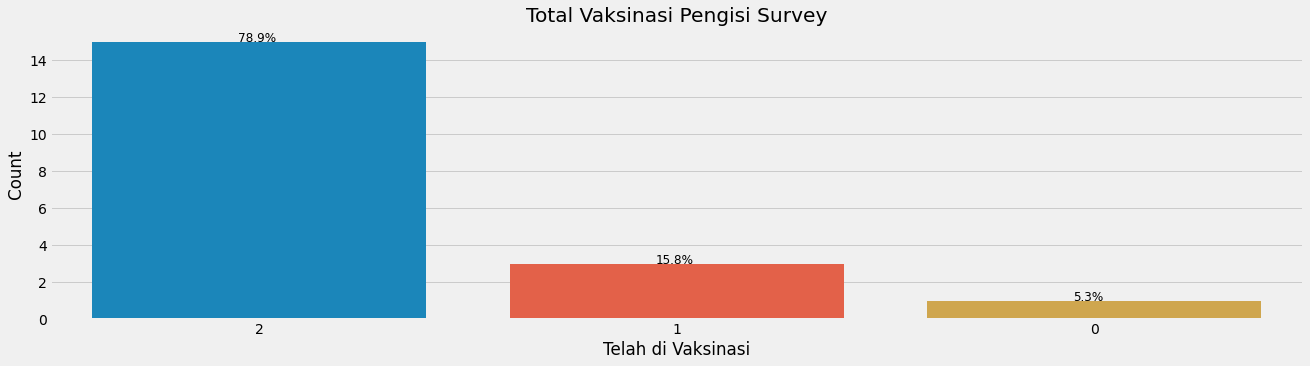

In [ ]:
plt.figure(figsize = (20, 5))
ax = sns.countplot(df.TOTAL_VAKSIN, order =  df.TOTAL_VAKSIN.value_counts().index)
plt.title("Total Vaksinasi Pengisi Survey")
plt.ylabel("Count")
plt.xlabel("Telah di Vaksinasi");
without_hue(ax, df.TOTAL_VAKSIN)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


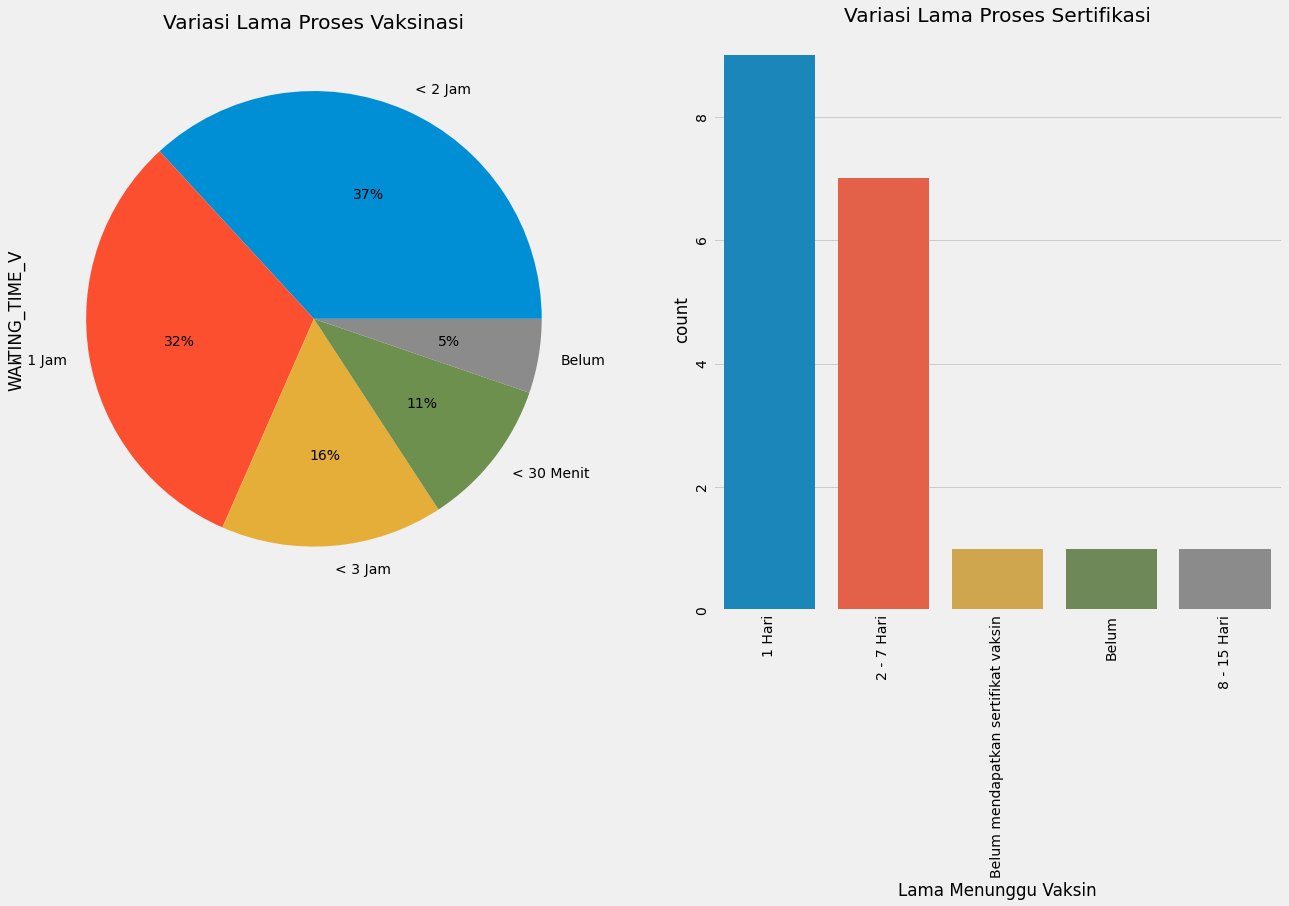

In [ ]:
# age
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
df.WAITING_TIME_V.value_counts().plot.pie(autopct='%1.0f%%', ax = ax[0]).set_title("Variasi Lama Proses Vaksinasi")
sns.countplot(df.WAITING_TIME_C, order = df.WAITING_TIME_C.value_counts().index, axes = ax[1]).set_title("Variasi Lama Proses Sertifikasi")
ax[1].set_xlabel("Lama Menunggu Vaksin")
ax[1].tick_params(labelrotation = 90);

# Siammese Architecture 

### Setup

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from pathlib import Path
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import Model
from tensorflow.keras.applications import resnet

target_shape = (200, 200)

In [ ]:
cache_dir = Path(Path.home()) / ".keras"
anchor_images_path = cache_dir / "left"
positive_images_path = cache_dir / "right"

In [ ]:
!gdown --id 1jvkbTr_giSP3Ru8OwGNCg6B4PvVbcO34
!gdown --id 1EzBZUb_mh_Dp_FKD0P4XiYYSd0QBH5zW
!unzip -oq left.zip -d $cache_dir
!unzip -oq right.zip -d $cache_dir

Downloading...
From: https://drive.google.com/uc?id=1jvkbTr_giSP3Ru8OwGNCg6B4PvVbcO34
To: /content/left.zip
100% 104M/104M [00:01<00:00, 75.9MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1EzBZUb_mh_Dp_FKD0P4XiYYSd0QBH5zW
To: /content/right.zip
100% 104M/104M [00:18<00:00, 5.55MB/s] 


### Preprocessing

In [ ]:
def preprocess_image(filename):
    """
    Load the specified file as a JPEG image, preprocess it and
    resize it to the target shape.
    """

    image_string = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image_string, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, target_shape)
    return image


def preprocess_triplets(anchor, positive, negative):
    """
    Given the filenames corresponding to the three images, load and
    preprocess them.
    """

    return (
        preprocess_image(anchor),
        preprocess_image(positive),
        preprocess_image(negative),
    )

In [ ]:
# We need to make sure both the anchor and positive images are loaded in
# sorted order so we can match them together.
anchor_images = sorted(
    [str(anchor_images_path / f) for f in os.listdir(anchor_images_path)]
)

positive_images = sorted(
    [str(positive_images_path / f) for f in os.listdir(positive_images_path)]
)

image_count = len(anchor_images)

anchor_dataset = tf.data.Dataset.from_tensor_slices(anchor_images)
positive_dataset = tf.data.Dataset.from_tensor_slices(positive_images)

# To generate the list of negative images, let's randomize the list of
# available images and concatenate them together.
rng = np.random.RandomState(seed=42)
rng.shuffle(anchor_images)
rng.shuffle(positive_images)

negative_images = anchor_images + positive_images
np.random.RandomState(seed=32).shuffle(negative_images)

negative_dataset = tf.data.Dataset.from_tensor_slices(negative_images)
negative_dataset = negative_dataset.shuffle(buffer_size=4096)

dataset = tf.data.Dataset.zip((anchor_dataset, positive_dataset, negative_dataset))
dataset = dataset.shuffle(buffer_size=1024)
dataset = dataset.map(preprocess_triplets)

# Let's now split our dataset in train and validation.
train_dataset = dataset.take(round(image_count * 0.8))
val_dataset = dataset.skip(round(image_count * 0.8))

train_dataset = train_dataset.batch(32, drop_remainder=False)
train_dataset = train_dataset.prefetch(8)

val_dataset = val_dataset.batch(32, drop_remainder=False)
val_dataset = val_dataset.prefetch(8)

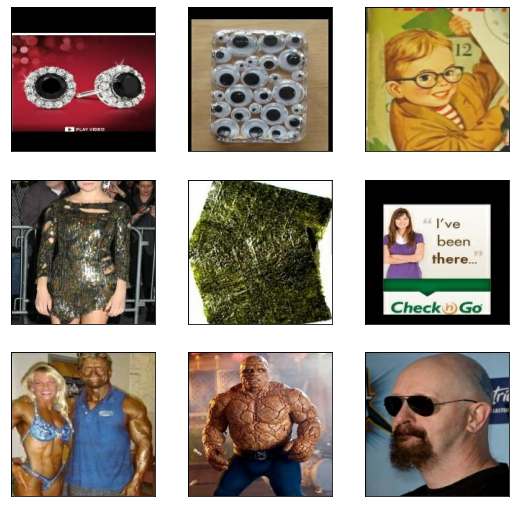

In [ ]:
def visualize(anchor, positive, negative):
    """Visualize a few triplets from the supplied batches."""

    def show(ax, image):
        ax.imshow(image)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    fig = plt.figure(figsize=(9, 9))

    axs = fig.subplots(3, 3)
    for i in range(3):
        show(axs[i, 0], anchor[i])
        show(axs[i, 1], positive[i])
        show(axs[i, 2], negative[i])


visualize(*list(train_dataset.take(1).as_numpy_iterator())[0])

### Architecture

In [ ]:
base_cnn = resnet.ResNet50(
    weights="imagenet", input_shape=target_shape + (3,), include_top=False
)

flatten = layers.Flatten()(base_cnn.output)
dense1 = layers.Dense(512, activation="relu")(flatten)
dense1 = layers.BatchNormalization()(dense1)
dense2 = layers.Dense(256, activation="relu")(dense1)
dense2 = layers.BatchNormalization()(dense2)
output = layers.Dense(256)(dense2)

embedding = Model(base_cnn.input, output, name="Embedding")

trainable = False
for layer in base_cnn.layers:
    if layer.name == "conv5_block1_out":
        trainable = True
    layer.trainable = trainable

94781440/94765736 [==============================] - 3s 0us/step


In [ ]:
embedding.summary()

Model: "Embedding"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
__________________________________________________________________________________________

In [ ]:
import pandas as pd
import re

In [ ]:
stringlist = []
embedding.summary(print_fn=lambda x: stringlist.append(x))
summ_string = "\n".join(stringlist)
print(summ_string) # entire summary in a variable

table = stringlist[1:-4][1::2] # take every other element and remove appendix

new_table = []
for entry in table:
    entry = re.split(r'\s{2,}', entry)[:-1] # remove whitespace
    new_table.append(entry)

df = pd.DataFrame(new_table[1:], columns=new_table[0])
print(df.head())

Model: "Embedding"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
__________________________________________________________________________________________

In [ ]:
df.to_excel("Model.xlsx", index = False)

In [ ]:
!pip install visualkeras

     |████████████████████████████████| 795 kB 4.2 MB/s 


In [ ]:
import visualkeras

In [ ]:
visualkeras.layered_view(embedding, legend = True, to_file = "embedding.png").show()

In [ ]:
class DistanceLayer(layers.Layer):
    """
    This layer is responsible for computing the distance between the anchor
    embedding and the positive embedding, and the anchor embedding and the
    negative embedding.
    """

    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, anchor, positive, negative):
        ap_distance = tf.reduce_sum(tf.square(anchor - positive), -1)
        an_distance = tf.reduce_sum(tf.square(anchor - negative), -1)
        return (ap_distance, an_distance)


anchor_input = layers.Input(name="anchor", shape=target_shape + (3,))
positive_input = layers.Input(name="positive", shape=target_shape + (3,))
negative_input = layers.Input(name="negative", shape=target_shape + (3,))

distances = DistanceLayer()(
    embedding(resnet.preprocess_input(anchor_input)),
    embedding(resnet.preprocess_input(positive_input)),
    embedding(resnet.preprocess_input(negative_input)),
)

siamese_network = Model(
    inputs=[anchor_input, positive_input, negative_input], outputs=distances
)

In [ ]:
class SiameseModel(Model):
    """The Siamese Network model with a custom training and testing loops.

    Computes the triplet loss using the three embeddings produced by the
    Siamese Network.

    The triplet loss is defined as:
       L(A, P, N) = max(‖f(A) - f(P)‖² - ‖f(A) - f(N)‖² + margin, 0)
    """

    def __init__(self, siamese_network, margin=0.5):
        super(SiameseModel, self).__init__()
        self.siamese_network = siamese_network
        self.margin = margin
        self.loss_tracker = metrics.Mean(name="loss")

    def call(self, inputs):
        return self.siamese_network(inputs)

    def train_step(self, data):
        # GradientTape is a context manager that records every operation that
        # you do inside. We are using it here to compute the loss so we can get
        # the gradients and apply them using the optimizer specified in
        # `compile()`.
        with tf.GradientTape() as tape:
            loss = self._compute_loss(data)

        # Storing the gradients of the loss function with respect to the
        # weights/parameters.
        gradients = tape.gradient(loss, self.siamese_network.trainable_weights)

        # Applying the gradients on the model using the specified optimizer
        self.optimizer.apply_gradients(
            zip(gradients, self.siamese_network.trainable_weights)
        )

        # Let's update and return the training loss metric.
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    def test_step(self, data):
        loss = self._compute_loss(data)

        # Let's update and return the loss metric.
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    def _compute_loss(self, data):
        # The output of the network is a tuple containing the distances
        # between the anchor and the positive example, and the anchor and
        # the negative example.
        ap_distance, an_distance = self.siamese_network(data)

        # Computing the Triplet Loss by subtracting both distances and
        # making sure we don't get a negative value.
        loss = ap_distance - an_distance
        loss = tf.maximum(loss + self.margin, 0.0)
        return loss

    @property
    def metrics(self):
        # We need to list our metrics here so the `reset_states()` can be
        # called automatically.
        return [self.loss_tracker]

In [ ]:
siamese_model = SiameseModel(siamese_network)
siamese_model.compile(optimizer=optimizers.Adam(0.0001))
history = siamese_model.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
151/151 [==============================] - 199s 1s/step - loss: 0.5012 - val_loss: 0.3885
Epoch 2/10
151/151 [==============================] - 151s 1s/step - loss: 0.3867 - val_loss: 0.3599
Epoch 3/10
151/151 [==============================] - 151s 1s/step - loss: 0.3615 - val_loss: 0.3708
Epoch 4/10
151/151 [==============================] - 151s 1s/step - loss: 0.3465 - val_loss: 0.3303
Epoch 5/10
151/151 [==============================] - 151s 1s/step - loss: 0.3405 - val_loss: 0.3277
Epoch 6/10
151/151 [==============================] - 151s 1s/step - loss: 0.3246 - val_loss: 0.2956
Epoch 7/10
151/151 [==============================] - 151s 1s/step - loss: 0.3186 - val_loss: 0.3122
Epoch 8/10
151/151 [==============================] - 151s 1s/step - loss: 0.3024 - val_loss: 0.3006
Epoch 9/10
151/151 [==============================] - 151s 1s/step - loss: 0.2928 - val_loss: 0.3156
Epoch 10/10
151/151 [==============================] - 151s 1s/step - loss: 0.2962 - val_lo

In [ ]:
siamese_network.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
anchor (InputLayer)             [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
positive (InputLayer)           [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
negative (InputLayer)           [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
tf.__operators__.getitem (Slici (None, 200, 200, 3)  0           anchor[0][0]                     
______________________________________________________________________________________________

In [ ]:
train_dataset

<PrefetchDataset shapes: ((None, 200, 200, 3), (None, 200, 200, 3), (None, 200, 200, 3)), types: (tf.float32, tf.float32, tf.float32)>

In [ ]:
val_dataset

<PrefetchDataset shapes: ((None, 200, 200, 3), (None, 200, 200, 3), (None, 200, 200, 3)), types: (tf.float32, tf.float32, tf.float32)>